# Loan Application Status Prediction


Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Z:\ML Datasets\Loan.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#filling categorical columns with mode
df['Gender']  = df['Gender'].fillna(df['Gender'].mode()[0]) 
df['Married']  = df['Married'].fillna(df['Married'].mode()[0]) 
df['Dependents']  = df['Dependents'].fillna(df['Dependents'].mode()[0]) 
df['Self_Employed']  = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]) 

#filling numeric columns with mode
df['LoanAmount']  = df['LoanAmount'].fillna(df['LoanAmount'].mean()) 
df['Loan_Amount_Term']  = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) 
df['Credit_History']  = df['Credit_History'].fillna(df['Credit_History'].mean())

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Gender
Male      502
Female    112
Name: Gender, dtype: int64

Married
Yes    401
No     213
Name: Married, dtype: int64

Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

LoanAmount
146.412162    22
120.000000

# EDA

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

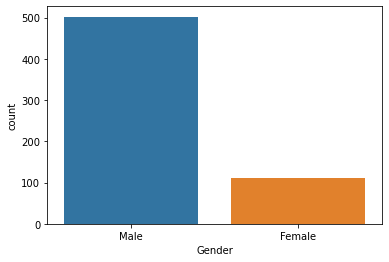

In [9]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

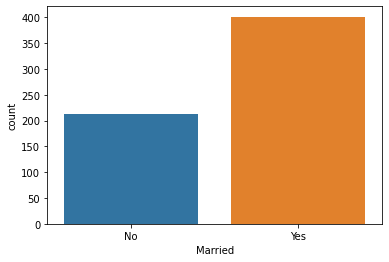

In [10]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

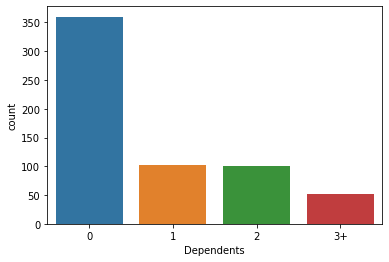

In [11]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

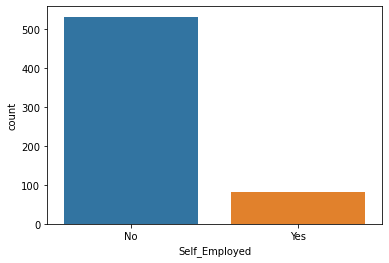

In [12]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

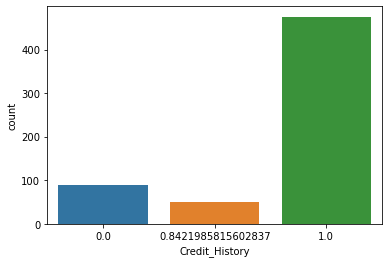

In [13]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

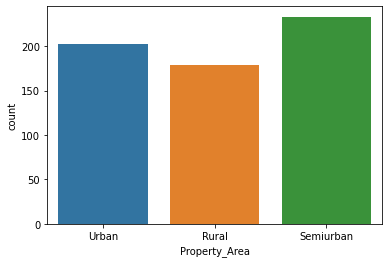

In [14]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

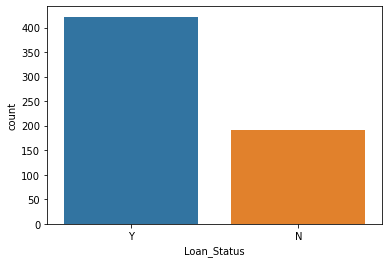

In [15]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

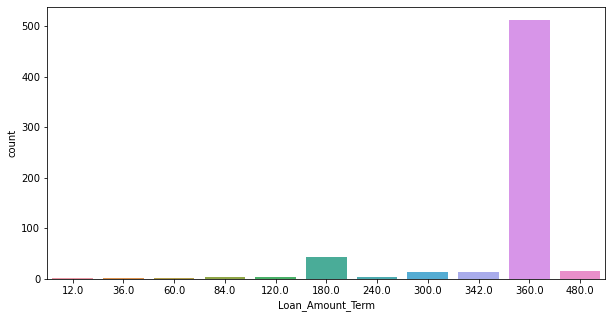

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['Loan_Amount_Term'])

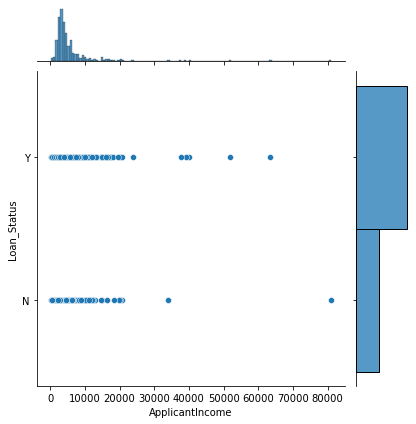

In [17]:
sns.jointplot(data = df, x = 'ApplicantIncome', y = 'Loan_Status')

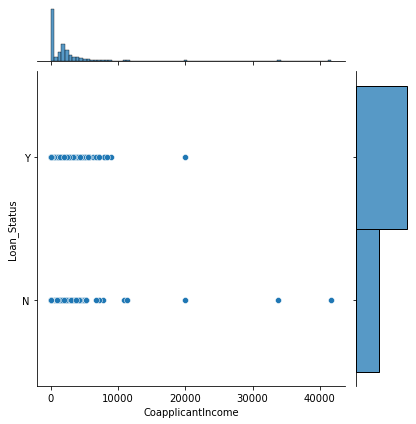

In [18]:
sns.jointplot(data = df, x = 'CoapplicantIncome', y = 'Loan_Status')

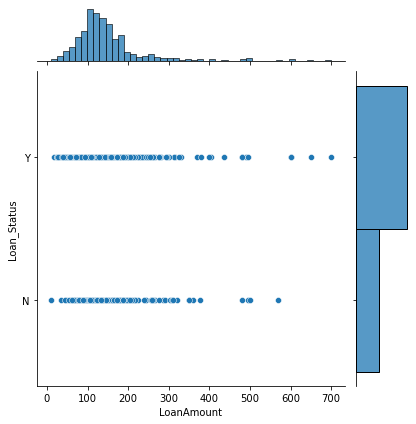

In [19]:
sns.jointplot(data = df, x = 'LoanAmount', y = 'Loan_Status')

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,1,0,0,306,60,81,9,2,0,0
2,2,1,1,0,0,1,139,0,26,9,2,2,1
3,3,1,1,0,1,0,90,160,73,9,2,2,1
4,4,1,0,0,0,0,381,0,94,9,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,9,2,0,1
610,610,1,1,3,0,0,275,0,7,5,2,0,1
611,611,1,1,1,0,0,431,3,163,9,2,2,1
612,612,1,1,2,0,0,422,0,133,9,2,2,1


# Correlation

In [21]:
df.corr().sum()

Loan_ID              0.888816
Gender               1.903202
Married              2.105723
Dependents           1.790017
Education            0.403949
Self_Employed        1.294701
ApplicantIncome      1.479410
CoapplicantIncome    1.089282
LoanAmount           2.183274
Loan_Amount_Term     0.567755
Credit_History       1.389031
Property_Area        0.425915
Loan_Status          1.544688
dtype: float64

<AxesSubplot:>

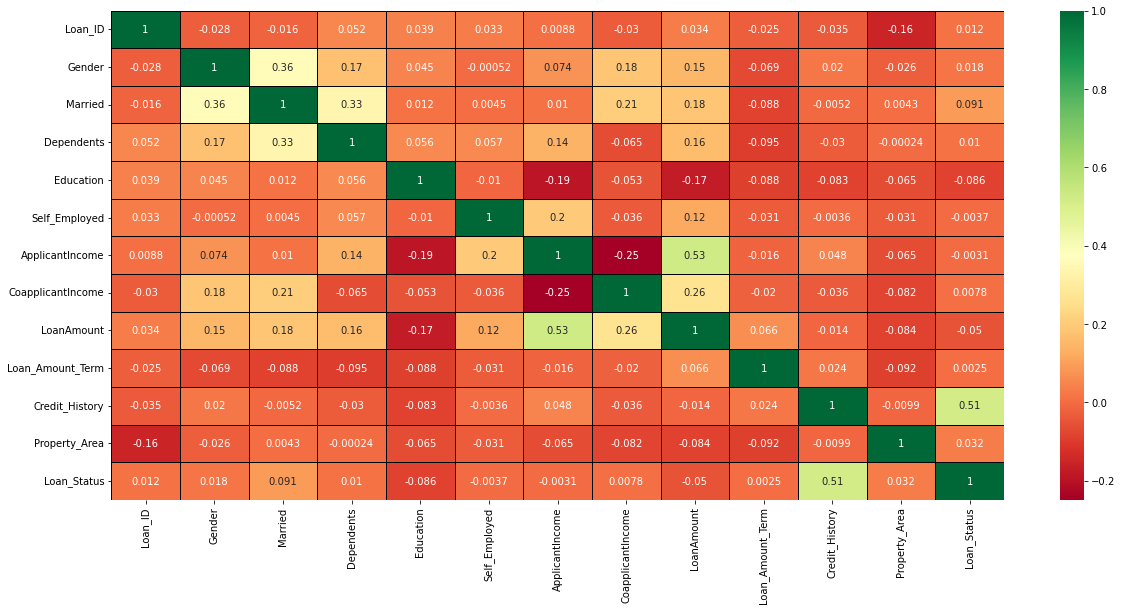

In [22]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', cmap = 'RdYlGn')

Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Education            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.110714x0.343182)
LoanAmount              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.390714,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.656429,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

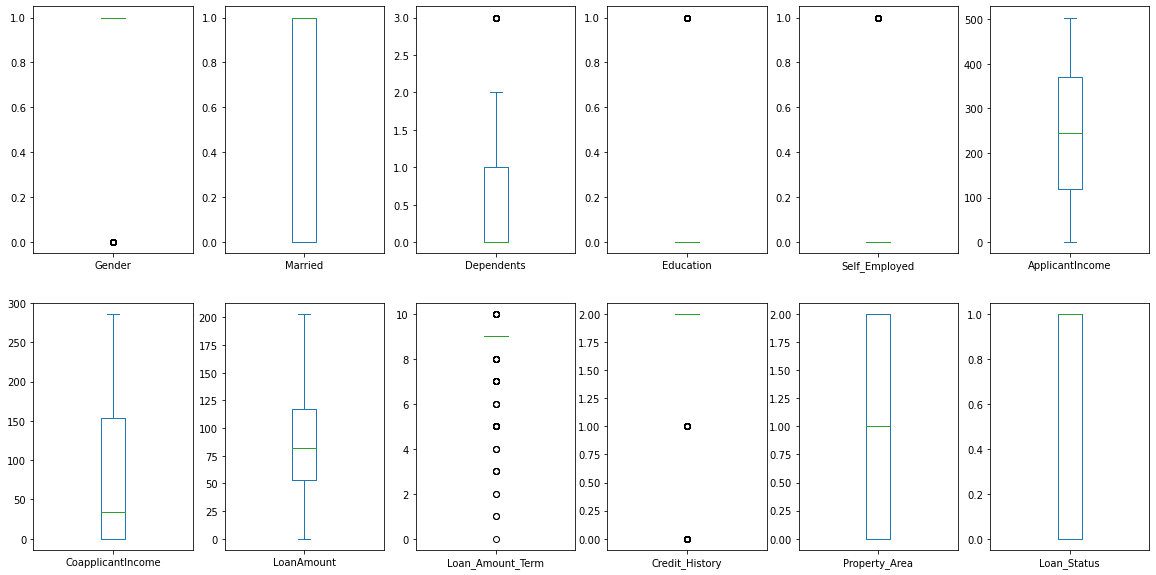

In [23]:
df.drop(['Loan_ID'], axis = 1, inplace = True)
df.plot(kind = 'box', subplots = True, layout = (2,6),  figsize = (20,10))

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis=1)]
df1.shape, df.shape

((602, 12), (614, 12))

In [25]:
loss = ((614 - 602)/614)*100
loss

1.9543973941368076

# Skewness

In [26]:
df1.skew()

Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.471894
Loan_Amount_Term    -2.668469
Credit_History      -1.590563
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

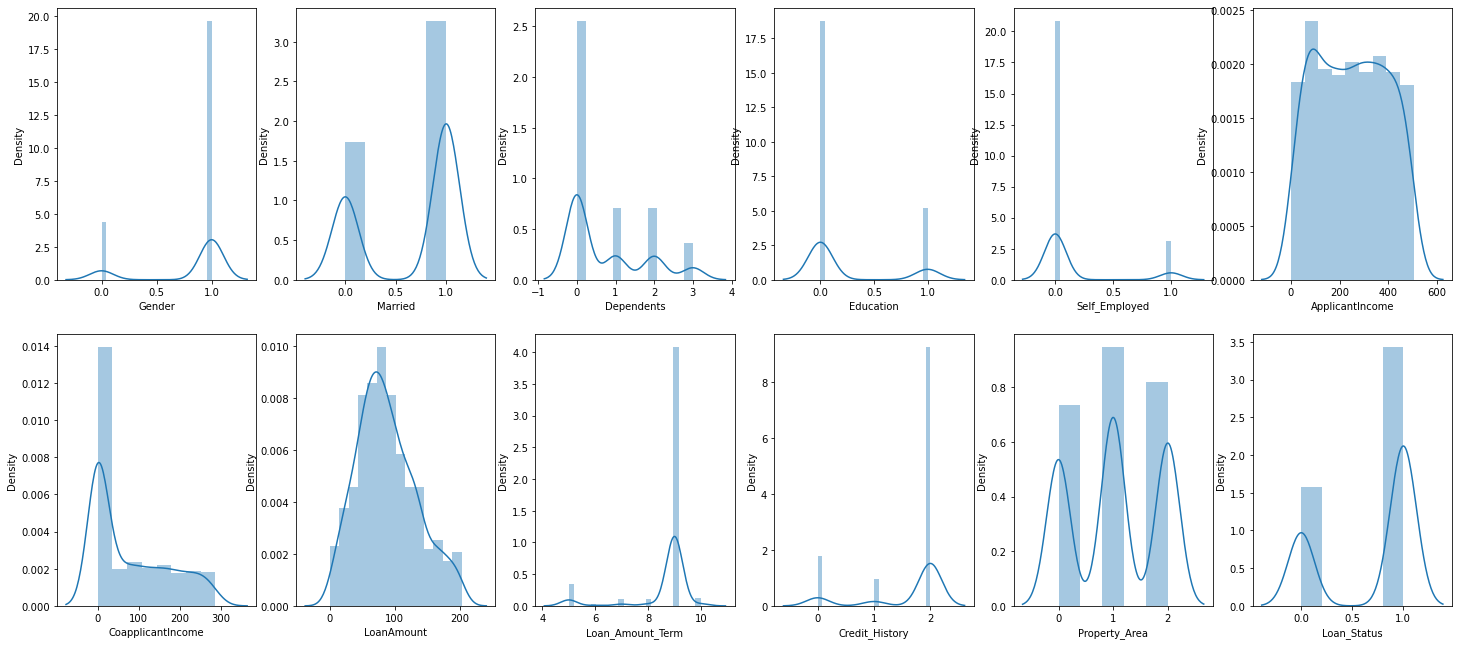

In [27]:
plt.figure(figsize=(25,11))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(2,6,i)
    sns.distplot(df1[column])

In [28]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.817276,0.652824,0.739203,0.217608,0.131229,247.574751,79.280731,88.244186,8.646179,1.624585,1.033223,0.686047
std,0.386762,0.476468,1.009155,0.412963,0.337932,144.175671,92.540566,45.590580,1.113849,0.728726,0.788156,0.464484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,118.250000,0.000000,54.250000,9.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,246.500000,36.500000,83.000000,9.000000,2.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,371.750000,153.750000,117.000000,9.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000


In [29]:
X = df1.drop(['Loan_Status'], axis = 1)
Y = df1['Loan_Status']

In [30]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 0.47283955, -1.3712705 , -0.82182285, ...,  0.20620035,
         0.54068954,  1.19599758],
       [ 0.47283955,  0.72925072,  0.86706034, ...,  0.20620035,
         0.54068954, -1.3449695 ],
       [ 0.47283955,  0.72925072, -0.82182285, ...,  0.20620035,
         0.54068954,  1.19599758],
       ...,
       [ 0.47283955,  0.72925072,  0.86706034, ...,  0.20620035,
         0.54068954,  1.19599758],
       [ 0.47283955,  0.72925072,  1.32345929, ...,  0.20620035,
         0.54068954,  1.19599758],
       [-2.11488233, -1.3712705 , -0.82182285, ...,  0.20620035,
        -1.97056651,  0.01073718]])

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.47283955, -1.3712705 , -0.82182285, ...,  0.20620035,
         0.54068954,  1.19599758],
       [ 0.47283955,  0.72925072,  0.86706034, ...,  0.20620035,
         0.54068954, -1.3449695 ],
       [ 0.47283955,  0.72925072, -0.82182285, ...,  0.20620035,
         0.54068954,  1.19599758],
       ...,
       [ 0.47283955,  0.72925072,  0.86706034, ...,  0.20620035,
         0.54068954,  1.19599758],
       [ 0.47283955,  0.72925072,  1.32345929, ...,  0.20620035,
         0.54068954,  1.19599758],
       [-2.11488233, -1.3712705 , -0.82182285, ...,  0.20620035,
        -1.97056651,  0.01073718]])

In [32]:
X = pd.DataFrame(X)

In [33]:
Y.value_counts()

1    413
0    189
Name: Loan_Status, dtype: int64

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)
Y.value_counts()

1    413
0    413
Name: Loan_Status, dtype: int64

# Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X_train, Y_train, cv=None)
cvs.mean()

[[42 35]
 [15 74]]
              precision    recall  f1-score   support

           0       0.74      0.55      0.63        77
           1       0.68      0.83      0.75        89

    accuracy                           0.70       166
   macro avg       0.71      0.69      0.69       166
weighted avg       0.71      0.70      0.69       166

0.6987951807228916


0.6757575757575757

In [38]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X_train, Y_train, cv=None)
cvs.mean()

[[71  6]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        77
           1       0.93      0.91      0.92        89

    accuracy                           0.92       166
   macro avg       0.91      0.92      0.92       166
weighted avg       0.92      0.92      0.92       166

0.9156626506024096


0.8378787878787879

In [39]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X_train, Y_train, cv=None)
cvs.mean()

[[69  8]
 [20 69]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        77
           1       0.90      0.78      0.83        89

    accuracy                           0.83       166
   macro avg       0.84      0.84      0.83       166
weighted avg       0.84      0.83      0.83       166

0.8313253012048193


0.8151515151515152

In [40]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X_train, Y_train, cv=None)
cvs.mean()

[[51 26]
 [16 73]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        77
           1       0.74      0.82      0.78        89

    accuracy                           0.75       166
   macro avg       0.75      0.74      0.74       166
weighted avg       0.75      0.75      0.74       166

0.7469879518072289


0.7196969696969697

In [41]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X_train, Y_train, cv=None)
cvs.mean()

[[55 22]
 [29 60]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        77
           1       0.73      0.67      0.70        89

    accuracy                           0.69       166
   macro avg       0.69      0.69      0.69       166
weighted avg       0.70      0.69      0.69       166

0.6927710843373494


0.6939393939393941

# Hyperparamter Tuning

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 600, num = 10)]
max_features = ['auto', "sqrt", 'log2']
max_depth    = [int(x) for x in np.linspace(35, 600, 11)]
min_samples_split = [2, 4, 10, 15]
min_samples_leaf  = [10, 20, 300, 400]

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "criterion" : ['gini', 'entropy']}
print(random_grid)

{'n_estimators': [10, 75, 141, 206, 272, 337, 403, 468, 534, 600], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [35, 91, 148, 204, 261, 317, 374, 430, 487, 543, 600], 'min_samples_split': [2, 4, 10, 15], 'min_samples_leaf': [10, 20, 300, 400], 'criterion': ['gini', 'entropy']}


In [43]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator = rf,
                         param_distributions = random_grid,
                         cv = 10,
                         random_state = 25,
                         verbose = 2,
                         n_jobs = -1)

rscv.fit(X_train, Y_train)
rscv

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [35, 91, 148, 204, 261,
                                                      317, 374, 430, 487, 543,
                                                      600],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 300, 400],
                                        'min_samples_split': [2, 4, 10, 15],
                                        'n_estimators': [10, 75, 141, 206, 272,
                                                         337, 403, 468, 534,
                                                         600]},
                   random_state=25, verbose=2)

In [44]:
rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 374,
 'criterion': 'entropy'}

In [45]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=374, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=10)

In [46]:
best_rscv = rscv.best_estimator_
pred_rscv = best_rscv.predict(X_test)

print(confusion_matrix(Y_test, pred_rscv))
print(classification_report(Y_test, pred_rscv))
print(accuracy_score(Y_test, pred_rscv))
cvs = cross_val_score(rscv, X, Y, cv=10)
cvs.mean()

[[52 25]
 [ 9 80]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.75        77
           1       0.76      0.90      0.82        89

    accuracy                           0.80       166
   macro avg       0.81      0.79      0.79       166
weighted avg       0.80      0.80      0.79       166

0.7951807228915663
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.7579194828092859

# Stratified K-Fold Cross Validation

In [48]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10)
skf.split(X,Y)

<generator object _BaseKFold.split at 0x0000023959A34F20>

In [49]:
accuracy= []

skf = StratifiedKFold(n_splits=10, random_state = None)
skf.get_n_splits(X,Y)

#X is the feature set and Y is the target
#Putiing train_index and test_index of X and Y

for train_index, test_index in skf.split(X,Y):
    print('Train:', train_index, 'Validation:', test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    Y1_train, Y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
rscv.fit(X1_train, Y1_train)
pred = rscv.predict(X1_test)
score = accuracy_score(pred, Y1_test)
accuracy.append(score)

Train: [ 70  72  77  78  79  82  83  84  85  86  87  88  89  90  91  93  94  95
  96  97  98  99 100 101 102 103 106 107 108 110 111 112 113 114 116 117
 118 119 120 121 122 123 124 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327

In [50]:
np.array(accuracy).mean()

0.8292682926829268

In [51]:
import pickle
filename = 'Loan Applicaiton Status.pkl'
pickle.dump(rf, open(filename, 'wb'))